In [214]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

In [215]:
NUM_DAYS = 10000    
INTERVAL = '1d'     
symbol = '^NYA'

[*********************100%***********************]  1 of 1 completed
6894
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1994-08-18  2701.479980  2701.479980  2701.479980  2701.479980  2701.479980   
1994-08-19  2704.870117  2704.870117  2704.870117  2704.870117  2704.870117   
1994-08-22  2699.159912  2699.159912  2699.159912  2699.159912  2699.159912   
1994-08-23  2711.530029  2711.530029  2711.530029  2711.530029  2711.530029   
1994-08-24  2734.469971  2734.469971  2734.469971  2734.469971  2734.469971   

            Volume  
Date                
1994-08-18       0  
1994-08-19       0  
1994-08-22       0  
1994-08-23       0  
1994-08-24       0  


<AxesSubplot:xlabel='Date'>

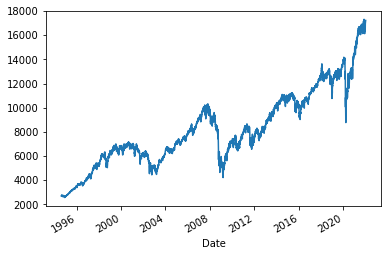

In [216]:
start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)

print(len(data))

print(data.head())

data["Close"].plot()

<AxesSubplot:xlabel='Date'>

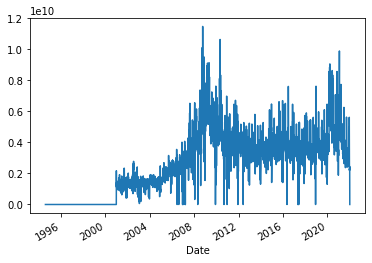

In [217]:
data["Volume"].plot()

<AxesSubplot:xlabel='Date'>

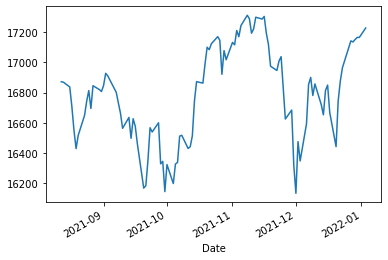

In [218]:
data.iloc[-100:]['Close'].plot()

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1994-08-18  2701.479980  2701.479980  2701.479980  2701.479980  2701.479980   
1994-08-19  2703.991193  2703.991193  2703.991193  2703.991193  2703.991193   
1994-08-22  2700.710187  2700.710187  2700.710187  2700.710187  2700.710187   
1994-08-23  2707.850230  2707.850230  2707.850230  2707.850230  2707.850230   
1994-08-24  2725.244419  2725.244419  2725.244419  2725.244419  2725.244419   

            Volume  
Date                
1994-08-18     0.0  
1994-08-19     0.0  
1994-08-22     0.0  
1994-08-23     0.0  
1994-08-24     0.0  


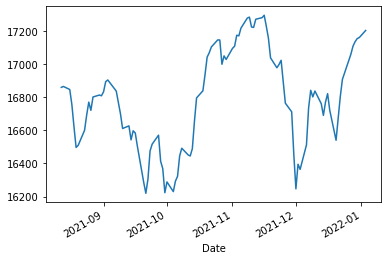

In [219]:
data = data.ewm(alpha=0.65).mean()
data = data.dropna()

data.iloc[-100:]['Close'].plot()

print(data.head())

In [220]:
live_pred_data = data.iloc[-100:-10]
live_pred_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-12,16838.138791,16865.973097,16788.568123,16859.576018,16859.576018,2.668172e+09
2021-08-13,16859.576018,16879.803084,16826.665640,16865.122700,16865.122700,2.475420e+09
2021-08-16,16865.122700,16872.202173,16750.320083,16846.674097,16846.674097,2.626057e+09
2021-08-17,16846.674097,16849.151913,16645.715935,16755.970993,16755.970993,2.793720e+09
2021-08-18,16755.970993,16771.436568,16580.725382,16622.310746,16622.310746,2.905189e+09
...,...,...,...,...,...,...
2021-12-13,16837.499592,16868.623826,16715.671204,16760.845560,16760.845560,3.173053e+09
2021-12-14,16760.845560,16803.536991,16646.783066,16690.472997,16690.472997,3.250850e+09
2021-12-15,16690.472997,16815.992439,16595.047218,16770.486252,16770.486252,3.326724e+09


In [221]:
def _produce_prediction(data, window):
    
    prediction = (data.shift(-window)['Close'] >= data['Close'])
    prediction = prediction.iloc[:-window]
    data['Pred'] = prediction.astype(int)
    
    return data

data = _produce_prediction(data, window=15)
del (data['Close'])
data = data.dropna()
data.tail()
print(len(data))

print(data)


6879
                    Open          High           Low     Adj Close  \
Date                                                                 
1994-08-18   2701.479980   2701.479980   2701.479980   2701.479980   
1994-08-19   2703.991193   2703.991193   2703.991193   2703.991193   
1994-08-22   2700.710187   2700.710187   2700.710187   2700.710187   
1994-08-23   2707.850230   2707.850230   2707.850230   2707.850230   
1994-08-24   2725.244419   2725.244419   2725.244419   2725.244419   
...                  ...           ...           ...           ...   
2021-12-06  16364.470645  16628.468701  16296.760318  16512.345683   
2021-12-07  16512.345683  16817.138850  16488.647068  16734.141692   
2021-12-08  16734.141692  16886.429750  16716.226669  16841.897541   
2021-12-09  16841.897541  16895.198362  16757.945936  16801.970097   
2021-12-10  16801.970097  16890.896477  16761.191722  16837.499592   

                  Volume  Pred  
Date                            
1994-08-18  0.0000

In [222]:
y = data['Pred']
features = [x for x in data.columns if x not in ['Pred']]
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.33)

In [223]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test.values, rf_prediction)
print('Random Forest Classifier Accuracy = ' , rf_accuracy , "\n")
print(classification_report(y_test, rf_prediction))

Random Forest Classifier Accuracy =  0.6654371881102191 

              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53      1747
         1.0       0.71      0.77      0.74      2862

    accuracy                           0.67      4609
   macro avg       0.64      0.63      0.63      4609
weighted avg       0.66      0.67      0.66      4609



In [224]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test.values, knn_prediction)
print('KNeighbors Classifier Accuracy = ' , knn_accuracy , "\n")
print(classification_report(y_test, knn_prediction))
confusion_matrix_graph = confusion_matrix(y_test, knn_prediction)

KNeighbors Classifier Accuracy =  0.6072900846170536 

              precision    recall  f1-score   support

         0.0       0.47      0.32      0.38      1747
         1.0       0.65      0.78      0.71      2862

    accuracy                           0.61      4609
   macro avg       0.56      0.55      0.55      4609
weighted avg       0.59      0.61      0.59      4609



In [225]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test.values, lr_prediction)
print('Logistic Regression Classifier Accuracy = ' , lr_accuracy , "\n")
print(classification_report(y_test, lr_prediction))

Logistic Regression Classifier Accuracy =  0.620958993274029 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1747
         1.0       0.62      1.00      0.77      2862

    accuracy                           0.62      4609
   macro avg       0.31      0.50      0.38      4609
weighted avg       0.39      0.62      0.48      4609



C:\Users\sefad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sefad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sefad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
